In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Path to the dataset file
dataset_path = '/content/drive/MyDrive/Credit_Card_Fraud_Detection/credit_card_transactions.csv'

# Check if the file exist
if os.path.exists(dataset_path):
  print("The dataset file is present.")
else:
  print("The dataset file is not present.")

The dataset file is present.


# 1. Exploratory Data Analysis

## General Analysis

In [ ]:
# All imports and utility functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split

df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  merch_zipcode  
count  1.296675e+06   1.100702e+06  
mean   5.788652e-03   4.682575e+04  
std    7.586269e-02   2.583400e+04  
min    0.000000e+00   1.001000e+03  
25%    0.000000e+00   2.511400e+04  
50%    0.000000e+00   4.586000e+04  
75%    0.000000e+00   6.831900e+04  
max    1.000000e+00   9.940300e+04

In [ ]:
# See how data actually looks like
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -118.2105      149   
2  Sanchez      M      594 White Dale Suite 530  ... -112.2620     4154   
3    White      M   9443 Cynthia Court Apt. 038  ... -112.1138     1939   
4   Garcia      M              408 Bradley Rest  ...  -79.4629       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud  merch_zipcode  
0        0        28705.0  
1        0            NaN  
2        0        83236.0  
3        0            NaN  
4        0        22844.0  

[5 rows x 24 columns]

In [ ]:
# List all the columns available in the dataset
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [ ]:
# Study each attribute and its characteristics
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

In [ ]:
# Check how many rows and columns are there in the dataset
df.shape

(1296675, 24)

In [ ]:
# Check the missing values
df.isna().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

There are missing values in merch_zipcode. This is not an issue because we are going to drop this and will use zip column only.

In [ ]:
# Check if the data has duplicate values
df.duplicated().sum()

0

There is no duplicated value. Good for us.

## Univariate Analysis

In [ ]:
# Take a copy of subset of dataframe consisting only fraudulent transactions
df_fraud = df[df['is_fraud'] == 1].copy()
print(df_fraud.shape)

(7506, 24)


0    1289169
1       7506
Name: is_fraud, dtype: int64


<Axes: xlabel='is_fraud', ylabel='Value Count'>

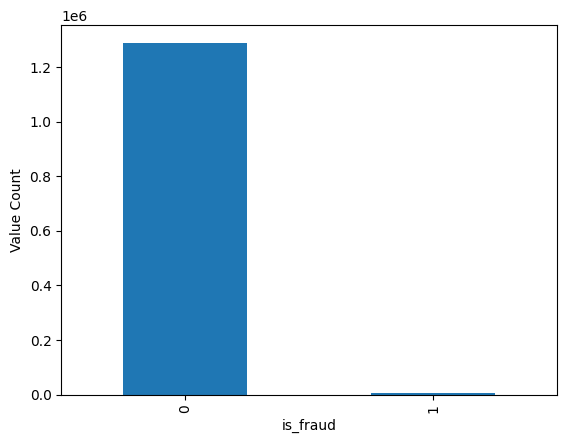

In [ ]:
# How many total fraud transactions are there in the dataframe
print(df['is_fraud'].value_counts())
df['is_fraud'].value_counts().plot(kind='bar', xlabel="is_fraud", ylabel="Value Count")

If we seperate the dataset in genuine and fraudulent transaction classes, then we see that the two classes are highly imbalanced. In this case the Precision, Recall and Accuracy scores do not give much of idea, becuase result is always skewed towards class with 99% of values.

So we will do Oversampling over Minority Data later during pre-processing to make the classess balanced.

## Bi-variate Analysis

In [ ]:
df_fraud['datetime'] = pd.to_datetime(df_fraud['unix_time'], unit='s')

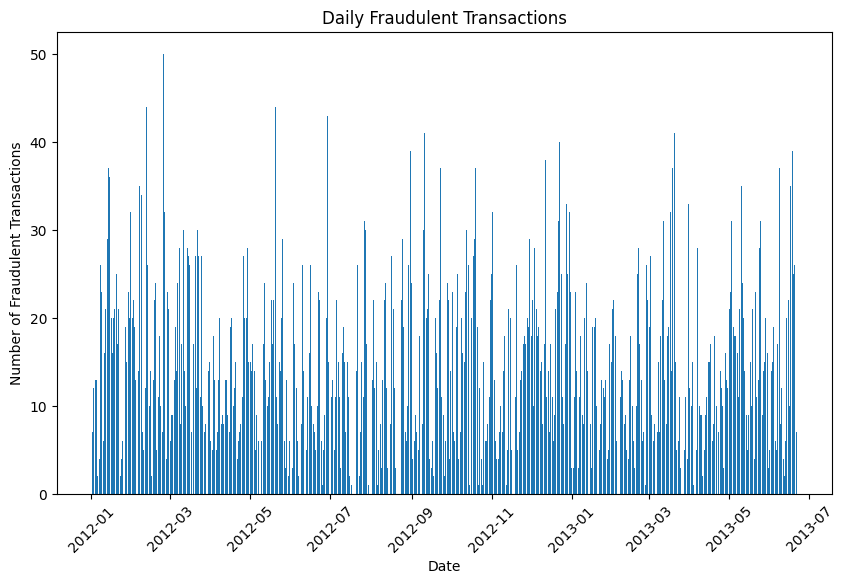

In [ ]:
# Check the frequency of fraud transactions per day (using binning per day)
df_fraud['date_bin'] = df_fraud['datetime'].dt.floor('D')
fraud_counts_by_day = df_fraud.groupby('date_bin').size().reset_index(name='fraud_count_by_day')

plt.figure(figsize=(10, 6))
plt.bar(fraud_counts_by_day['date_bin'], fraud_counts_by_day['fraud_count_by_day'])
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Daily Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

There is no relation observed between day and fraud transactions.

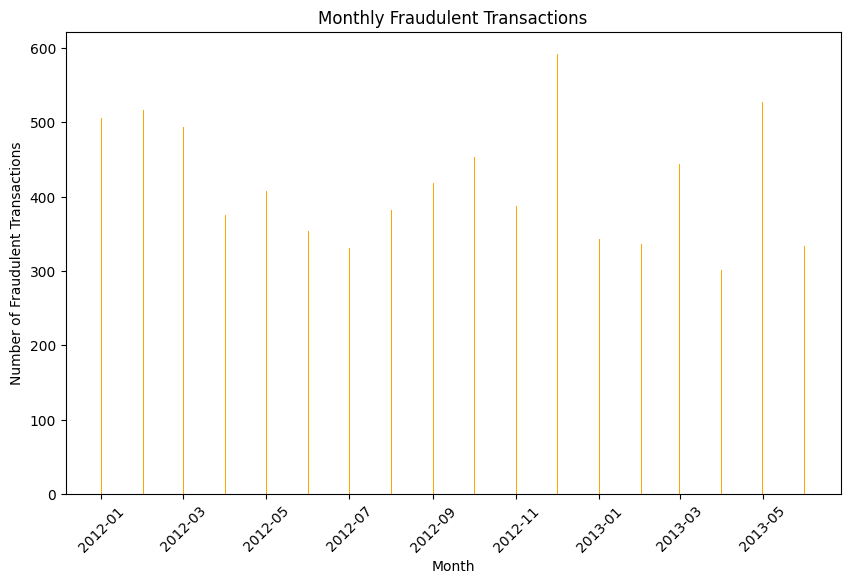

In [ ]:
 # Check the frequency of fraud transactions per month (using binning per month)
df_fraud['month_bin'] = df_fraud['datetime'].dt.to_period('M')
fraud_counts_by_month = df_fraud.groupby('month_bin').size().reset_index(name='fraud_count')

# Convert 'month_bin' to datetime for plotting
fraud_counts_by_month['month_bin'] = fraud_counts_by_month['month_bin'].dt.to_timestamp()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(fraud_counts_by_month['month_bin'], fraud_counts_by_month['fraud_count'], color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Monthly Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

We have 18 months transaction data.

There is no relation observed for fraud transactions happenning each months.


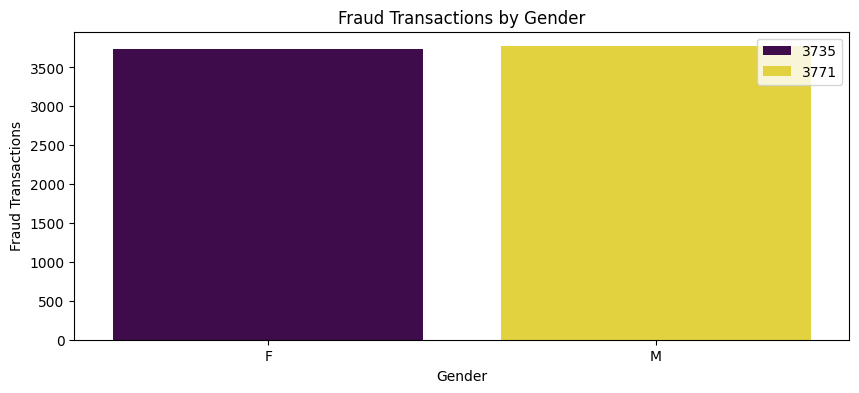

In [ ]:
plt.figure(figsize=(10,4))
ft_by_gender = df_fraud.groupby('gender')['is_fraud'].sum()
sns.barplot(x=ft_by_gender.index, y=ft_by_gender.values, palette='viridis', hue=ft_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Fraud Transactions')
plt.title('Fraud Transactions by Gender')

plt.show()

The number of fraud transactions for Male and Female are almost same.

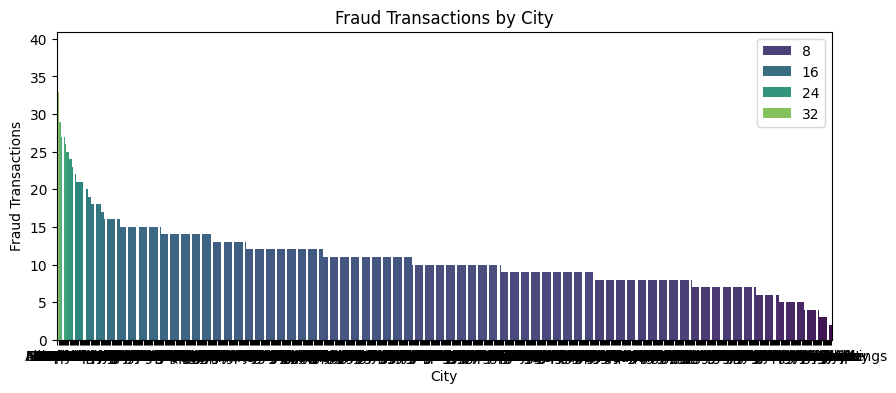

In [ ]:
plt.figure(figsize=(10,4))
ft_by_city = df_fraud.groupby('city')['is_fraud'].sum()
sns.barplot(x=ft_by_city.index, y=ft_by_city.values,
            palette='viridis', hue=ft_by_city.values,
            order=ft_by_city.sort_values(ascending=False).index)
plt.xlabel('City')
plt.ylabel('Fraud Transactions')
plt.title('Fraud Transactions by City')

plt.show()

Some cities have more fraud transactions (\~30) and some have less (\~5).

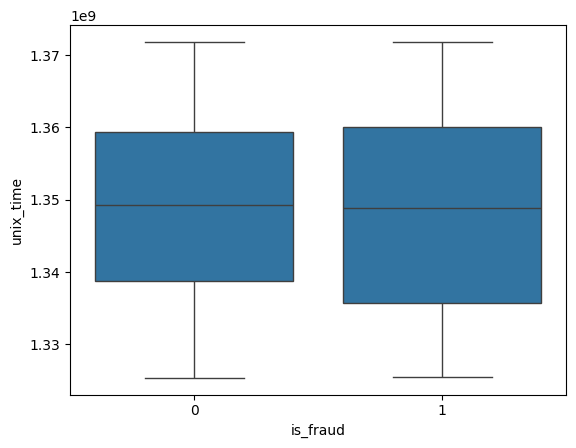

In [ ]:
sns.boxplot(data=df, x='is_fraud', y='unix_time')
plt.show()

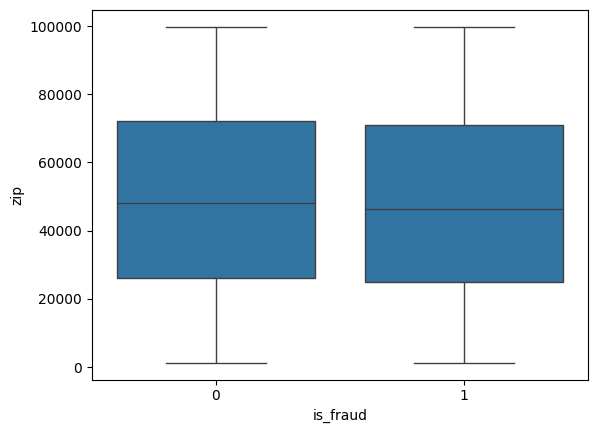

In [ ]:
sns.boxplot(data=df, x='is_fraud', y='zip')
plt.show()

From these box plots, it can be observed that there is no outlier.

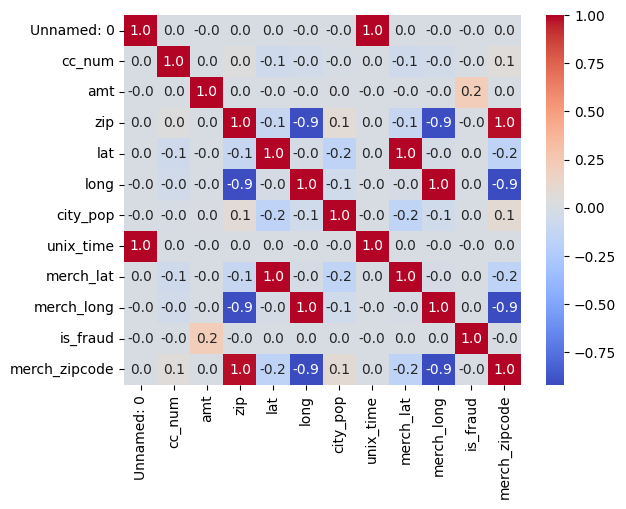

In [ ]:
# Check the correlations between attributes
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

We see that some of the attributes are higly correlated and can be dropped.

## Multivariate Analysis

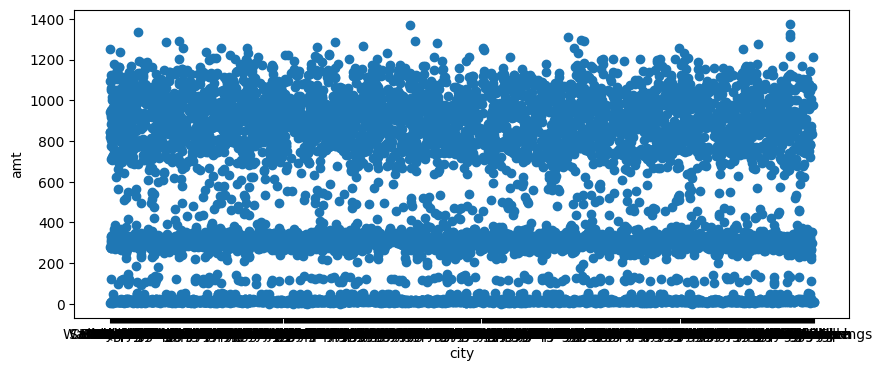

In [ ]:
# Let's check the amount of fraud transaction per city
plt.figure(figsize=(10,4))
plt.scatter(df_fraud['city'], df_fraud['amt'])
plt.xlabel('city')
plt.ylabel('amt')
plt.show()

From this scatter plot, it appears that the fraud transactions are spread across cities and the amount of fraud transactions are also almost similar across cities.

### EDA using dataprep

In [ ]:
!pip install dataprep

Computing diag-reshape-sqrt-de0c699be10ff87a66944e0b6d3b2b83: 100%|█████████▉| 10758/10811 [00:48<00:00, 202.60it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and 

DataPrep Report
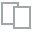
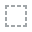
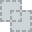
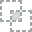
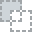
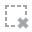
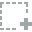
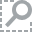
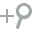
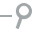
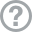
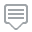
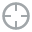
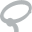
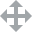
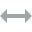
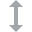
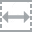
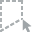
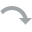
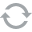
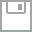
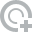
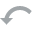
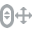
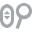
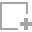
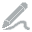
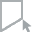
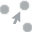
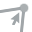
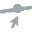

In [ ]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

create_report(df)